<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-25 16:36:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  21.9MB/s    in 8.1s    

2025-08-25 16:36:41 (18.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



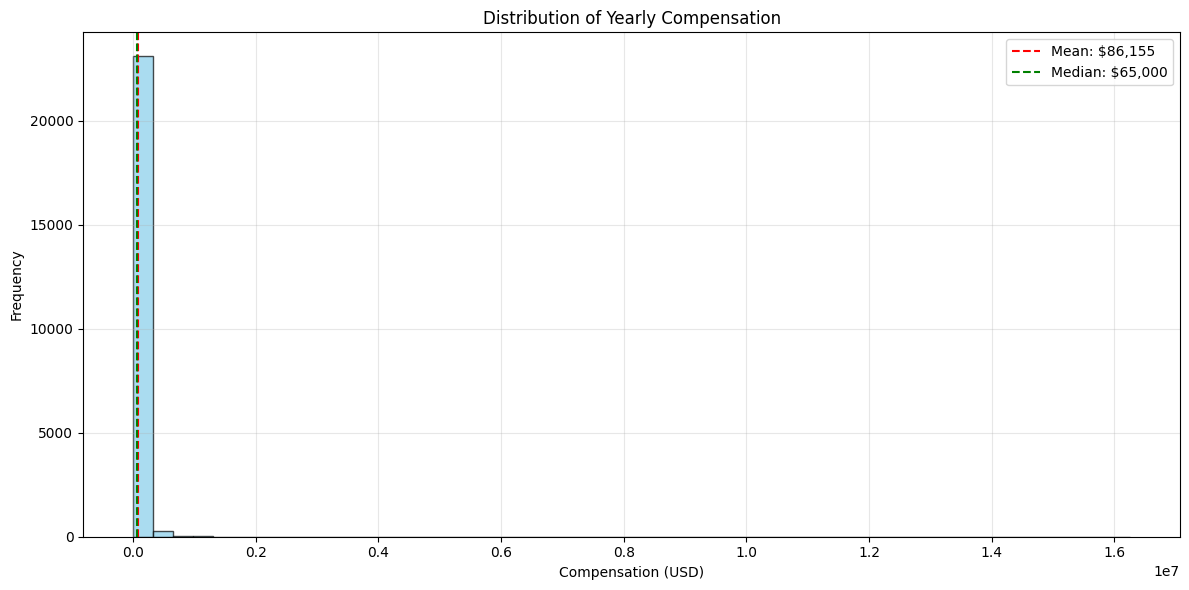

Mean compensation: $86,155.29
Median compensation: $65,000.00
Standard deviation: $186,756.97


In [14]:

if 'ConvertedCompYearly' in df.columns:
    # Clean the data
    comp_data = df['ConvertedCompYearly'].dropna()
    comp_data = comp_data[comp_data > 0]  # Remove invalid compensation values

    # Create histogram
    plt.figure(figsize=(12, 6))
    plt.hist(comp_data, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title('Distribution of Yearly Compensation')
    plt.xlabel('Compensation (USD)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # Add statistics
    mean_comp = comp_data.mean()
    median_comp = comp_data.median()
    plt.axvline(mean_comp, color='red', linestyle='--', label=f'Mean: ${mean_comp:,.0f}')
    plt.axvline(median_comp, color='green', linestyle='--', label=f'Median: ${median_comp:,.0f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Mean compensation: ${mean_comp:,.2f}")
    print(f"Median compensation: ${median_comp:,.2f}")
    print(f"Standard deviation: ${comp_data.std():,.2f}")

else:
    print("ConvertedCompYearly column not found")

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



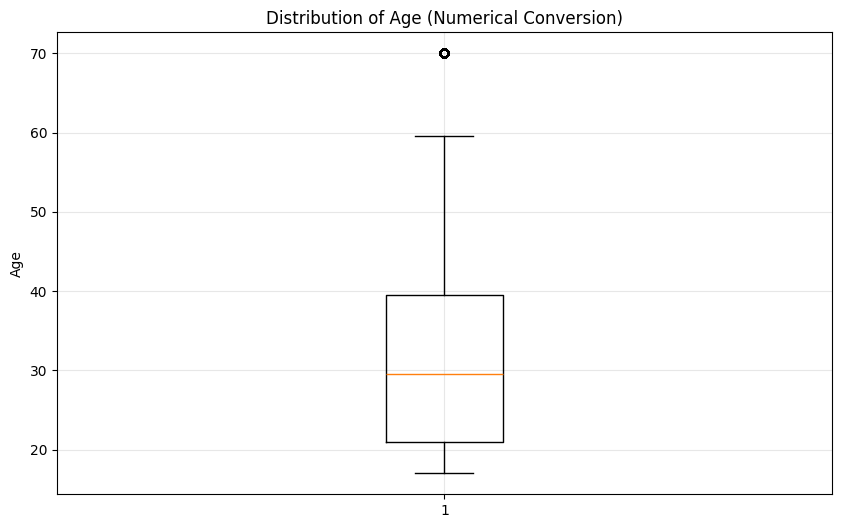

Age statistics:
Min: 17.0
Max: 70.0
Median: 29.5
Mean: 33.0


In [17]:
import numpy as np

if 'Age' in df.columns:
    # Convert age categories to numerical values
    def convert_age_to_numeric(age_str):
        if pd.isna(age_str):
            return np.nan
        age_mapping = {
            'Under 18 years old': 17,
            '18-24 years old': 21,
            '25-34 years old': 29.5,
            '35-44 years old': 39.5,
            '45-54 years old': 49.5,
            '55-64 years old': 59.5,
            '65 years or older': 70,
            'Unknown': np.nan
        }
        return age_mapping.get(age_str, np.nan)

    df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)
    age_data = df['Age_numeric'].dropna()

    # Create box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(age_data)
    plt.title('Distribution of Age (Numerical Conversion)')
    plt.ylabel('Age')
    plt.grid(True, alpha=0.3)
    plt.show()

    print("Age statistics:")
    print(f"Min: {age_data.min()}")
    print(f"Max: {age_data.max()}")
    print(f"Median: {age_data.median()}")
    print(f"Mean: {age_data.mean():.1f}")

else:
    print("Age column not found")

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



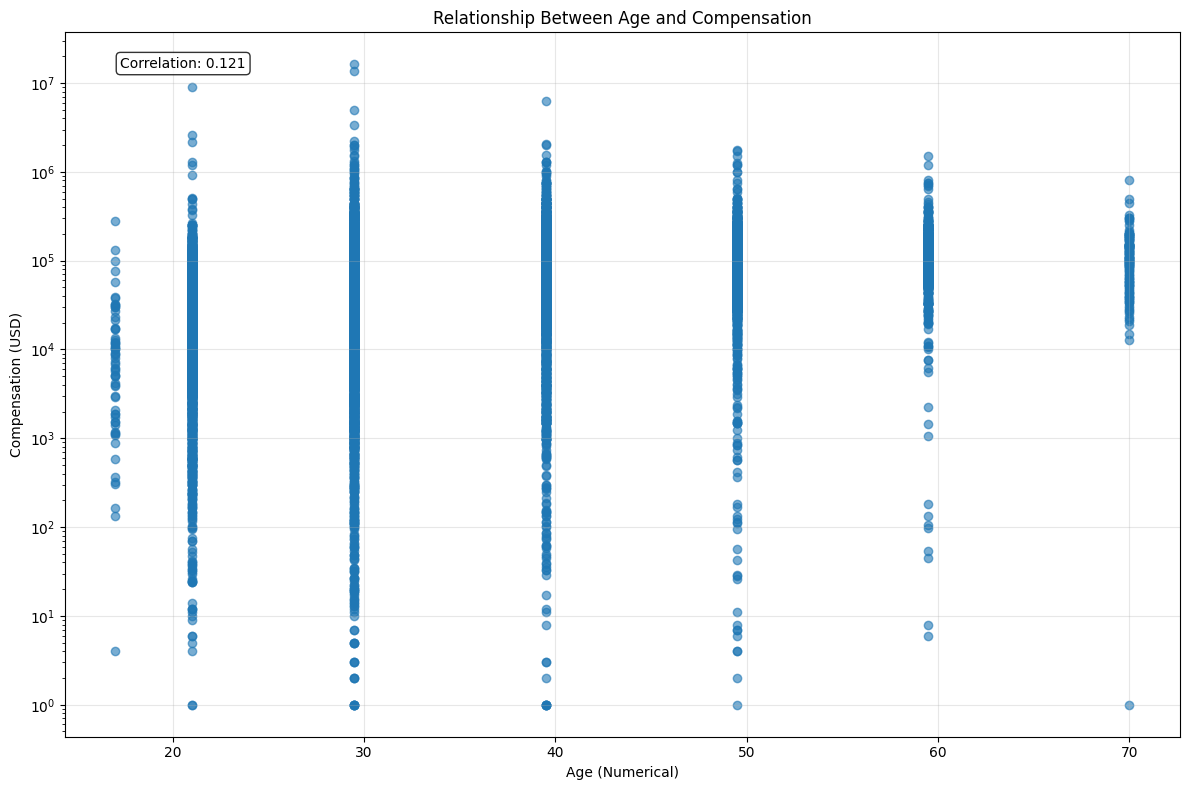

In [18]:
if 'Age_numeric' in df.columns and 'ConvertedCompYearly' in df.columns:
    # Clean the data
    scatter_data = df[['Age_numeric', 'ConvertedCompYearly']].dropna()
    scatter_data = scatter_data[scatter_data['ConvertedCompYearly'] > 0]

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(scatter_data['Age_numeric'], scatter_data['ConvertedCompYearly'], alpha=0.6)
    plt.title('Relationship Between Age and Compensation')
    plt.xlabel('Age (Numerical)')
    plt.ylabel('Compensation (USD)')
    plt.yscale('log')  # Use log scale for better visualization
    plt.grid(True, alpha=0.3)

    # Calculate correlation
    correlation = scatter_data['Age_numeric'].corr(scatter_data['ConvertedCompYearly'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found")

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


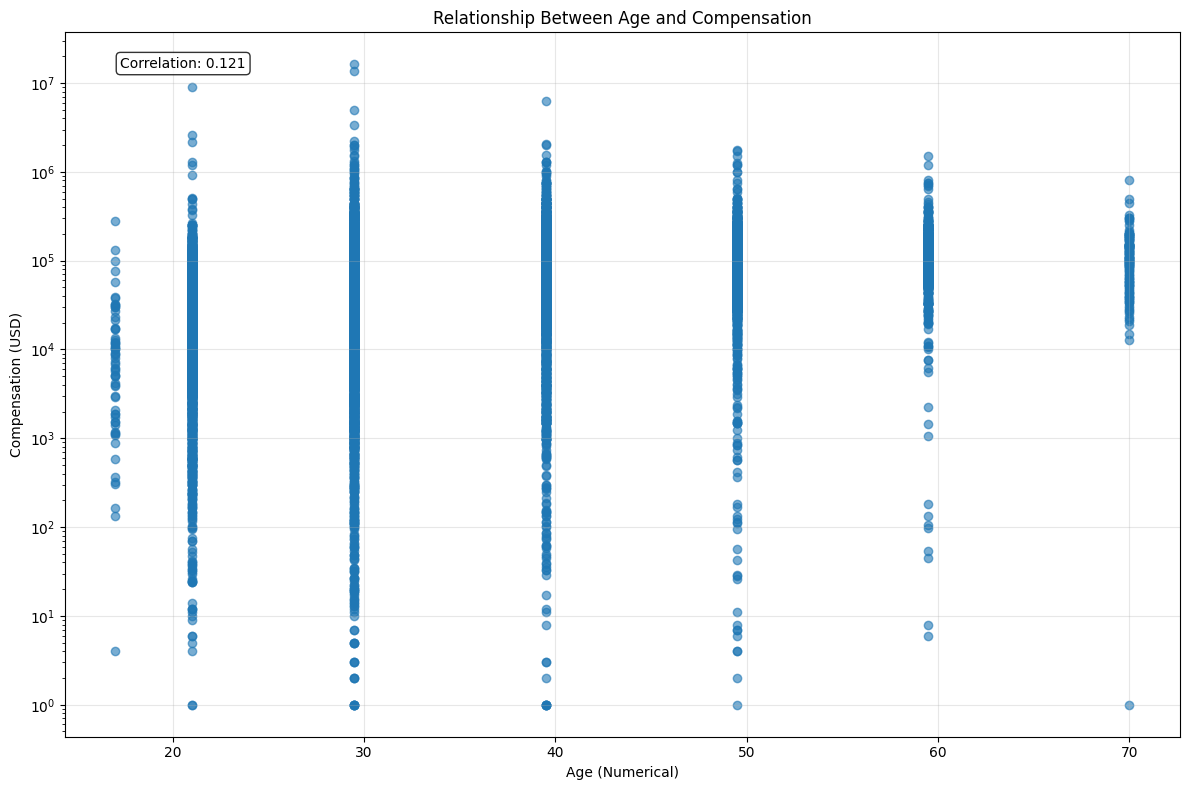

In [19]:
if 'Age_numeric' in df.columns and 'ConvertedCompYearly' in df.columns:
    # Clean the data
    scatter_data = df[['Age_numeric', 'ConvertedCompYearly']].dropna()
    scatter_data = scatter_data[scatter_data['ConvertedCompYearly'] > 0]

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(scatter_data['Age_numeric'], scatter_data['ConvertedCompYearly'], alpha=0.6)
    plt.title('Relationship Between Age and Compensation')
    plt.xlabel('Age (Numerical)')
    plt.ylabel('Compensation (USD)')
    plt.yscale('log')  # Use log scale for better visualization
    plt.grid(True, alpha=0.3)

    # Calculate correlation
    correlation = scatter_data['Age_numeric'].corr(scatter_data['ConvertedCompYearly'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found")

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



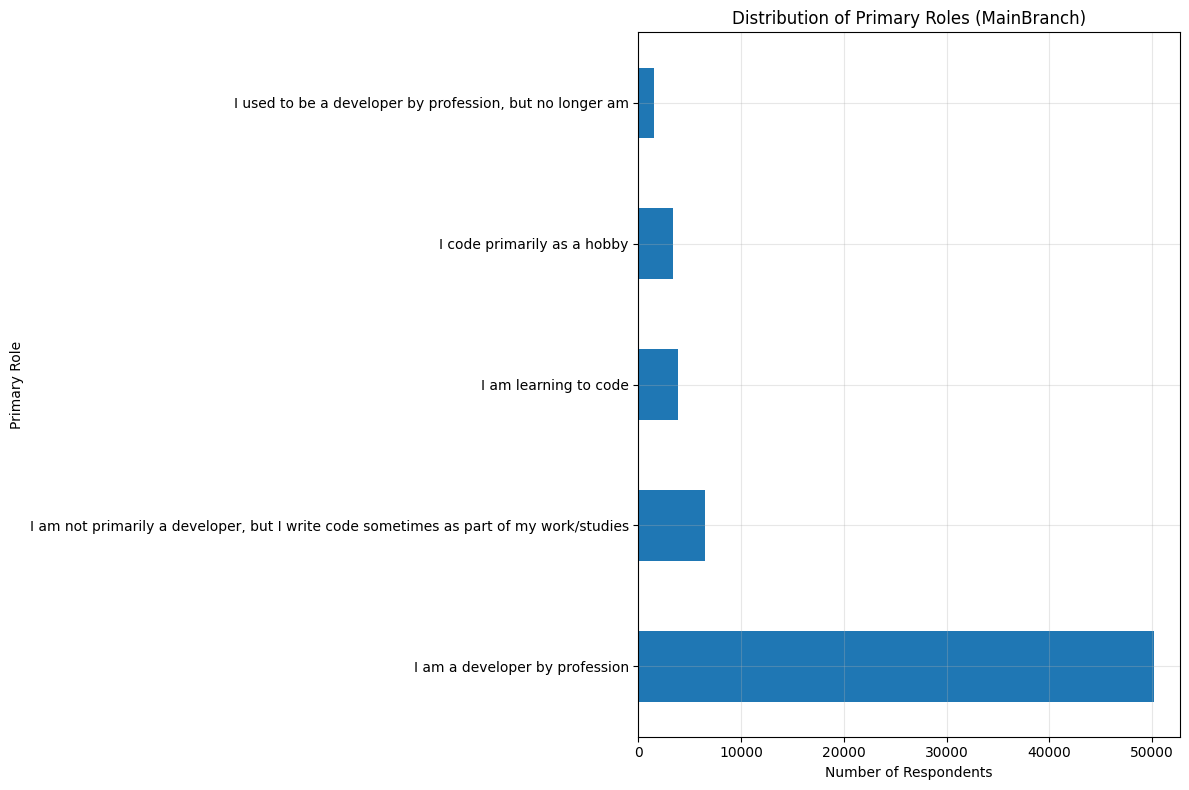

MainBranch distribution:
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


In [22]:
main_branch_columns = ['MainBranch']
if main_branch_columns:
    main_branch_col = main_branch_columns[0]
    main_branch_counts = df[main_branch_col].value_counts()

    # Create horizontal bar chart
    plt.figure(figsize=(12, 8))
    main_branch_counts.plot(kind='barh')
    plt.title('Distribution of Primary Roles (MainBranch)')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Primary Role')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("MainBranch distribution:")
    print(main_branch_counts)

else:
    print("MainBranch column not found")

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



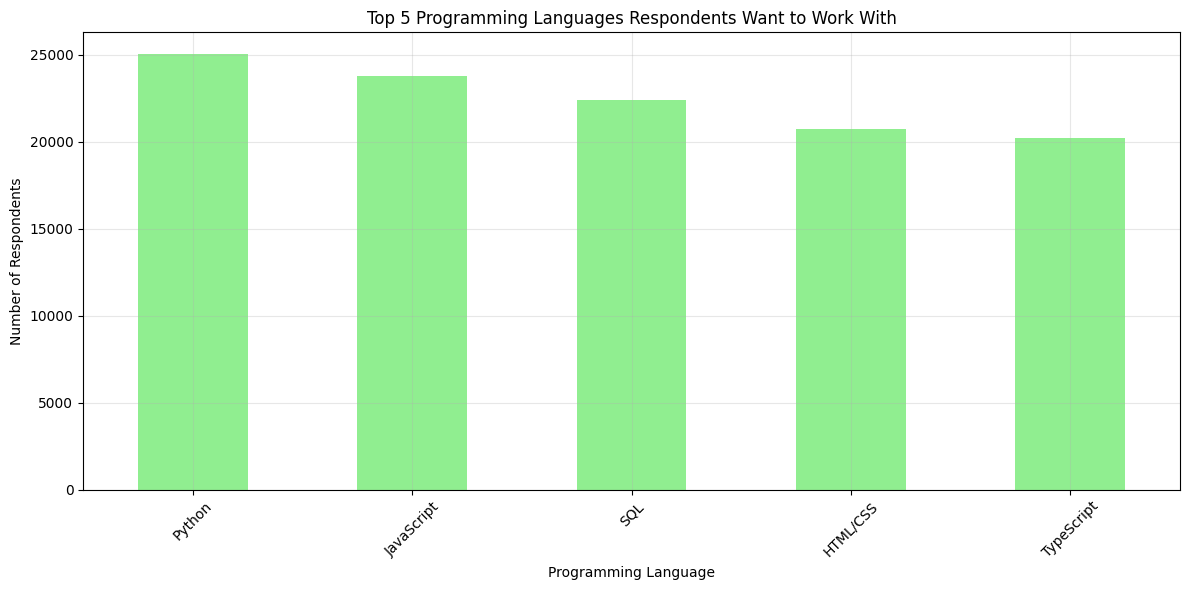

Top 5 desired programming languages:
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: count, dtype: int64


In [24]:
language_columns = ['LanguageWantToWorkWith']
if language_columns:
    language_col = language_columns[0]

    # Extract all languages
    all_languages = []
    for languages in df[language_col].dropna():
        if languages:
            lang_list = languages.split(';')
            all_languages.extend(lang_list)

    # Get top 5 languages
    top_languages = pd.Series(all_languages).value_counts().head(5)

    # Create vertical bar chart
    plt.figure(figsize=(12, 6))
    top_languages.plot(kind='bar', color='lightgreen')
    plt.title('Top 5 Programming Languages Respondents Want to Work With')
    plt.xlabel('Programming Language')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Top 5 desired programming languages:")
    print(top_languages)

else:
    print("LanguageWantToWorkWith column not found")

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


<Figure size 1400x800 with 0 Axes>

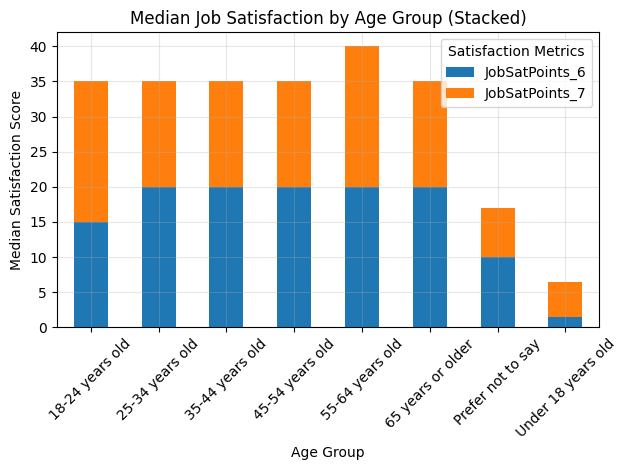

Job satisfaction by age group:
                    JobSatPoints_6  JobSatPoints_7
Age                                               
18-24 years old               15.0            20.0
25-34 years old               20.0            15.0
35-44 years old               20.0            15.0
45-54 years old               20.0            15.0
55-64 years old               20.0            20.0
65 years or older             20.0            15.0
Prefer not to say             10.0             7.0
Under 18 years old             1.5             5.0


In [26]:
job_sat_columns = ['JobSatPoints_6', 'JobSatPoints_7']
if len(job_sat_columns) >= 2 and 'Age' in df.columns:
    sat_col1, sat_col2 = job_sat_columns[0], job_sat_columns[1]

    # Group by age and calculate median satisfaction
    age_satisfaction = df.groupby('Age')[[sat_col1, sat_col2]].median().dropna()

    # Create stacked bar chart
    plt.figure(figsize=(14, 8))
    age_satisfaction.plot(kind='bar', stacked=True)
    plt.title('Median Job Satisfaction by Age Group (Stacked)')
    plt.xlabel('Age Group')
    plt.ylabel('Median Satisfaction Score')
    plt.legend(title='Satisfaction Metrics')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Job satisfaction by age group:")
    print(age_satisfaction)

else:
    print("Required columns not found")

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [27]:
databas_columns = ['DatabaseHaveWorkedWith']
if database_columns:
    database_col = database_columns[0]

    # Extract all databases
    all_databases = []
    for databases in df[database_col].dropna():
        if databases:
            db_list = databases.split(';')
            all_databases.extend(db_list)

    # Get top databases
    top_databases = pd.Series(all_databases).value_counts().head(10)

    # Create bar chart
    plt.figure(figsize=(12, 6))
    top_databases.plot(kind='bar', color='orange')
    plt.title('Top Databases Used by Respondents')
    plt.xlabel('Database')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Top databases used:")
    print(top_databases)

else:
    print("DatabaseHaveWorkedWith column not found")

NameError: name 'database_columns' is not defined

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



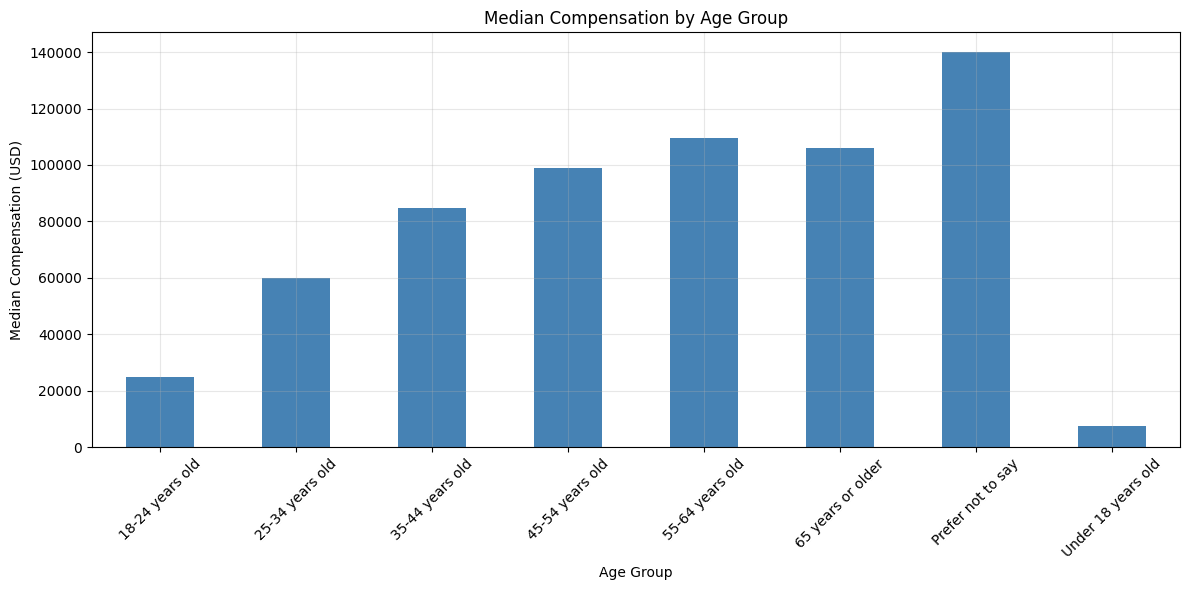

Median compensation by age group:
Age
18-24 years old        25000.0
25-34 years old        59825.0
35-44 years old        84796.0
45-54 years old        99099.0
55-64 years old       109691.0
65 years or older     106000.0
Prefer not to say     140000.0
Under 18 years old      7626.5
Name: ConvertedCompYearly, dtype: float64


In [28]:
if 'ConvertedCompYearly' in df.columns and 'Age' in df.columns:
    # Clean the data
    comp_age_data = df[['Age', 'ConvertedCompYearly']].dropna()
    comp_age_data = comp_age_data[comp_age_data['ConvertedCompYearly'] > 0]

    # Group by age and calculate median compensation
    age_comp_median = comp_age_data.groupby('Age')['ConvertedCompYearly'].median()

    # Create grouped bar chart
    plt.figure(figsize=(12, 6))
    age_comp_median.plot(kind='bar', color='steelblue')
    plt.title('Median Compensation by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Median Compensation (USD)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Median compensation by age group:")
    print(age_comp_median)

else:
    print("Required columns not found")

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



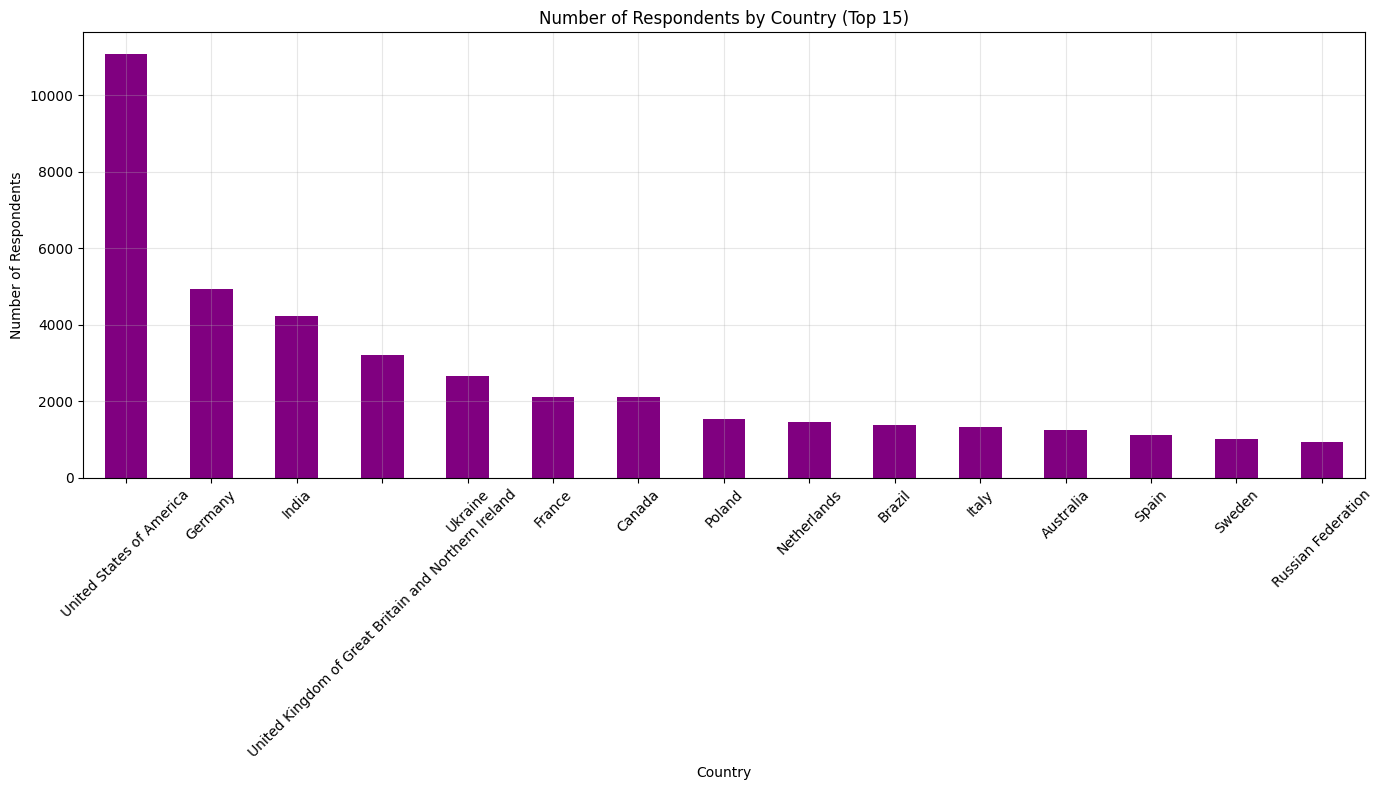

Respondent count by country (top 15):
Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                                   1016
Russian Federation                                        925
Name: count, dtype: int6

In [30]:
country_columns = ['Country']
if country_columns:
    country_col = country_columns[0]
    country_counts = df[country_col].value_counts().head(15)  # Top 15 countries

    # Create bar chart
    plt.figure(figsize=(14, 8))
    country_counts.plot(kind='bar', color='purple')
    plt.title('Number of Respondents by Country (Top 15)')
    plt.xlabel('Country')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Respondent count by country (top 15):")
    print(country_counts)

else:
    print("Country column not found")

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
